In [5]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("Data/order_items_with_major_category.csv")

In [6]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,major_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,기타
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,반려동물
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,가구 및 장식
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,향수
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,"도구, 정원"


In [7]:
#  major category 빈도 구하기
df_major_category = (
    df.groupby("major_category", as_index=False)
    .agg(n=("major_category", "count"))
    .sort_values("n", ascending=False, ignore_index=True)
)

In [8]:
df_major_category

,major_category,n
0,"침구, 테이블웨어, 욕실 용품",11115
1,미용 및 건강,9670
2,스포츠 및 레저,8671
3,가구 및 장식,8334
4,정보기술 액세서리,7827
5,가정용품,7428
6,"시계, 선물",5991
7,전화,4545
8,"도구, 정원",4347
9,자동차,4235


In [9]:
# major_category 빈도 상위 10개 추출; 대륙전체
top10 = df_major_category.head(10)
top10

,major_category,n
0,"침구, 테이블웨어, 욕실 용품",11115
1,미용 및 건강,9670
2,스포츠 및 레저,8671
3,가구 및 장식,8334
4,정보기술 액세서리,7827
5,가정용품,7428
6,"시계, 선물",5991
7,전화,4545
8,"도구, 정원",4347
9,자동차,4235


C:\Users\user\AppData\Local\Temp\ipykernel_18480\4040140631.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


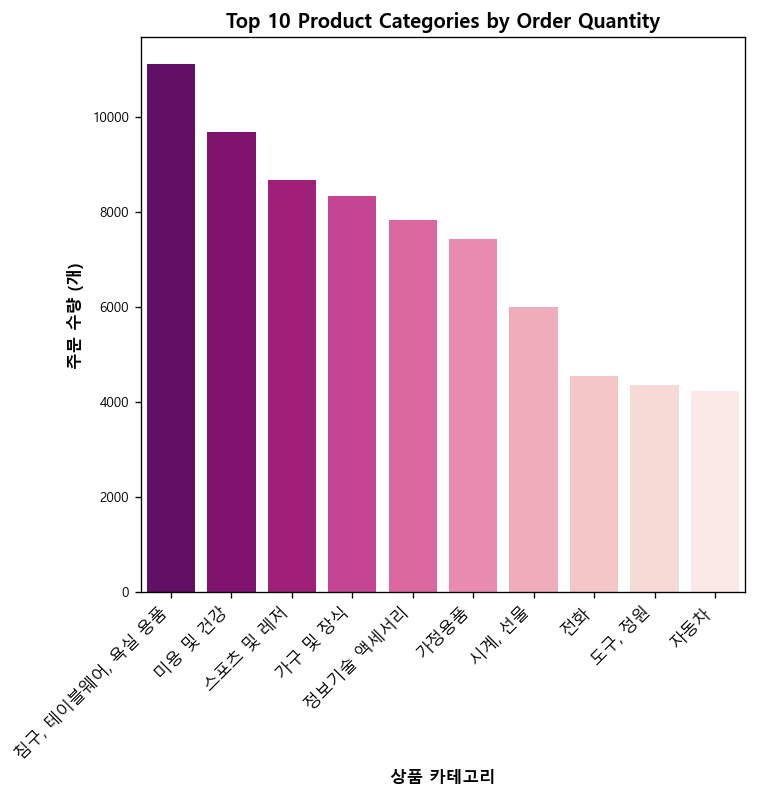

In [10]:
# [major category 빈도 막대 그래프 생성]
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update(
    {"font.family": "Malgun Gothic", "figure.dpi": "120", "figure.figsize": [6.5, 6]}
)

sns.barplot(
    data=top10,
    x="major_category",
    y="n",
    palette="RdPu_r",
)

plt.title("Top 10 Product Categories by Order Quantity", weight="bold")
plt.ylabel("주문 수량 (개)", weight="bold")
plt.xlabel("상품 카테고리", weight="bold")
plt.yticks(fontsize=8)
plt.xticks(rotation=45, ha='right')

plt.show()

In [11]:
# 해안지역 막대그래프

In [12]:
# [워드 클라우드 생성]

# 폰트 경로 지정
font = "Font/BMDOHYEON.ttf"

In [13]:
dic_major_category = df_major_category.set_index("major_category").to_dict()["n"]
dic_major_category

{'침구, 테이블웨어, 욕실 용품': 11115,
 '미용 및 건강': 9670,
 '스포츠 및 레저': 8671,
 '가구 및 장식': 8334,
 '정보기술 액세서리': 7827,
 '가정용품': 7428,
 '시계, 선물': 5991,
 '전화': 4545,
 '도구, 정원': 4347,
 '자동차': 4235,
 '장난감': 4117,
 '기타': 4093,
 '향수': 3419,
 '아기용품': 3065,
 '전자제품': 2767,
 '문구류': 2517,
 '건설 도구': 2372,
 '패션, 가방 및 액세서리': 2031,
 '반려동물': 1947,
 '사무용 가구': 1691,
 '식음료': 1167,
 '콘솔 게임': 1137,
 '여행가방 및 액세서리': 1092,
 '가전제품': 1009,
 '소형 가전제품': 770,
 '악기': 680,
 '일반 도서': 553,
 '거실 가구': 503,
 '오디오': 364,
 '마켓플레이스': 311,
 '주방, 식당, 정원 가구': 281,
 '산업, 상업 및 비즈니스': 268,
 '기술 도서': 267,
 '유선 전화': 264,
 '신발': 262,
 '예술': 233,
 '농업 산업 및 상업': 212,
 '컴퓨터': 203,
 '신호 및 보안': 199,
 '크리스마스 용품': 153,
 '남성 의류': 132,
 '속옷, 해변 패션': 131,
 '침실 가구': 109,
 '태블릿, 인쇄용품, 이미지용품': 83,
 '영화, 사진': 72,
 'DVD 및 블루레이': 64,
 '수입 도서': 60,
 '여성 의류': 48,
 '파티 용품': 43,
 '기저귀, 위생용품': 39,
 '음악': 38,
 '매트리스 및 소파': 38,
 '꽃': 33,
 '음악 CD 및 DVD': 14,
 '주방용품': 14,
 '게임용 PC': 9,
 '아동 및 청소년 의류': 8,
 '보험 및 서비스': 2}

In [14]:
# wc 만들기
from wordcloud import WordCloud

wc = WordCloud(
    random_state=1234,
    font_path=font,
    width=400,
    height=400,
    background_color="white",
)

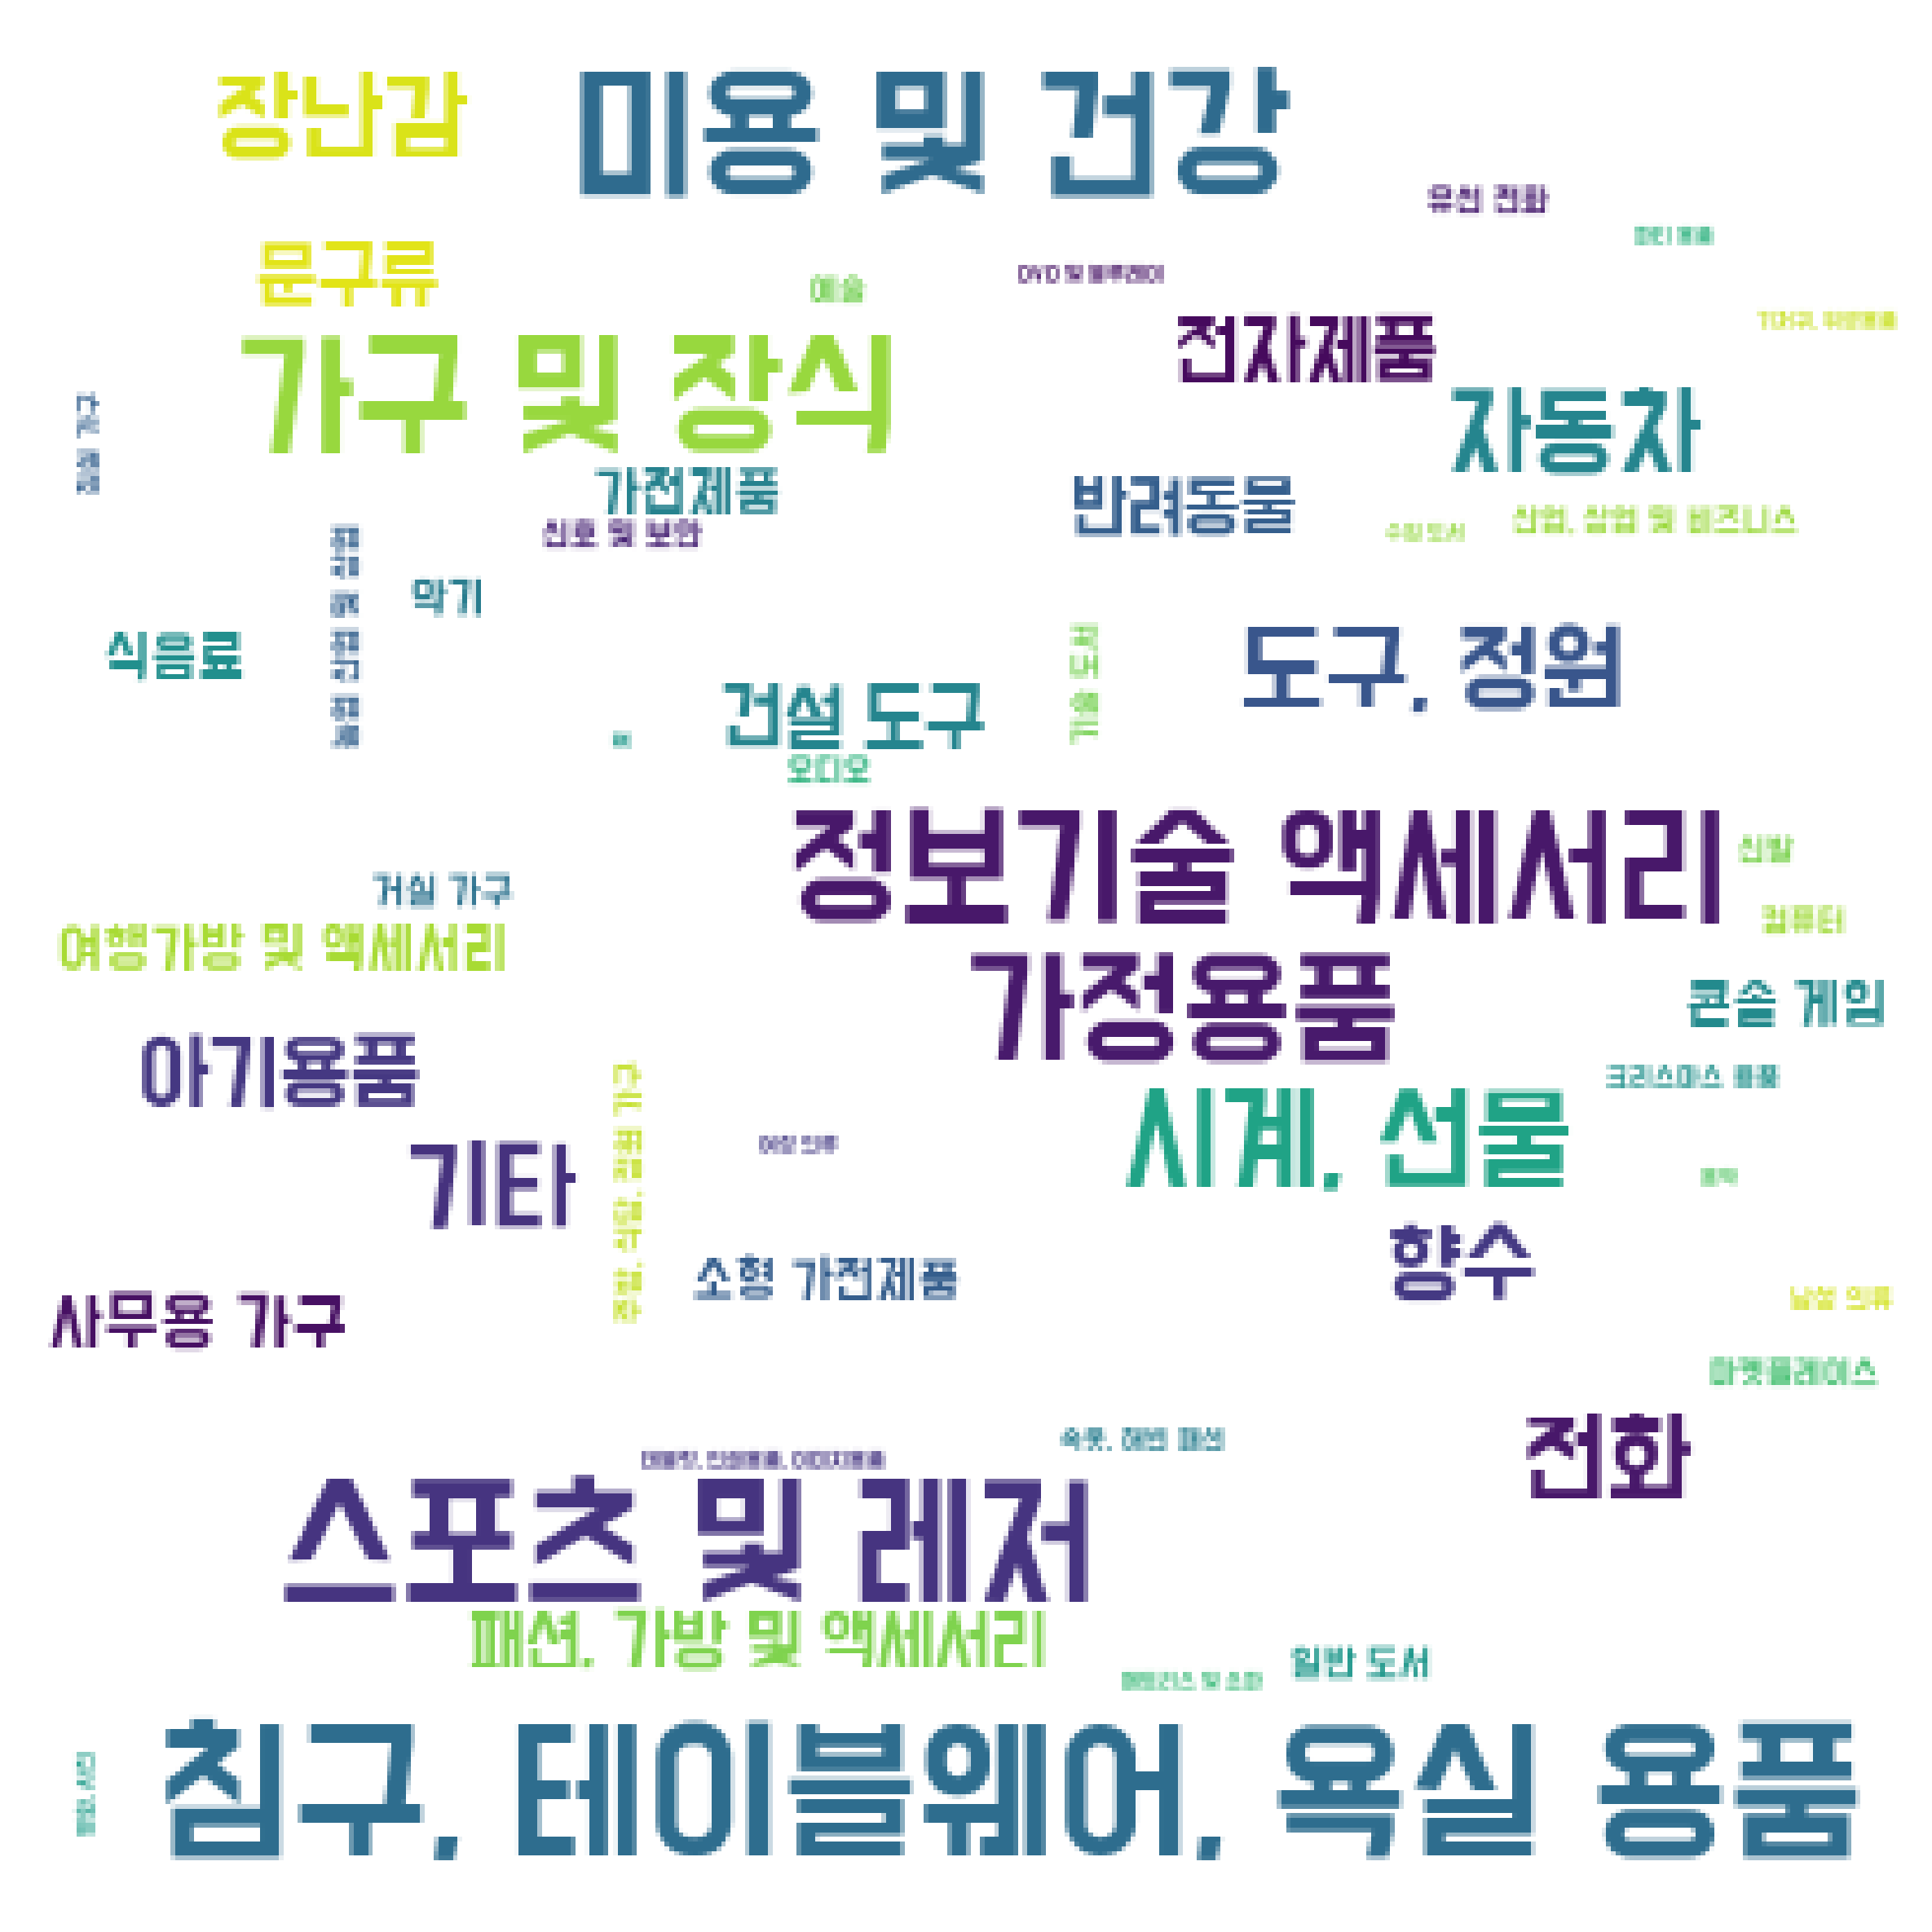

In [15]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_major_category)

# 워드 클라우드 출력하기
plt.figure(figsize=(10, 10), dpi=300)
plt.axis("off")
plt.imshow(img_wordcloud)

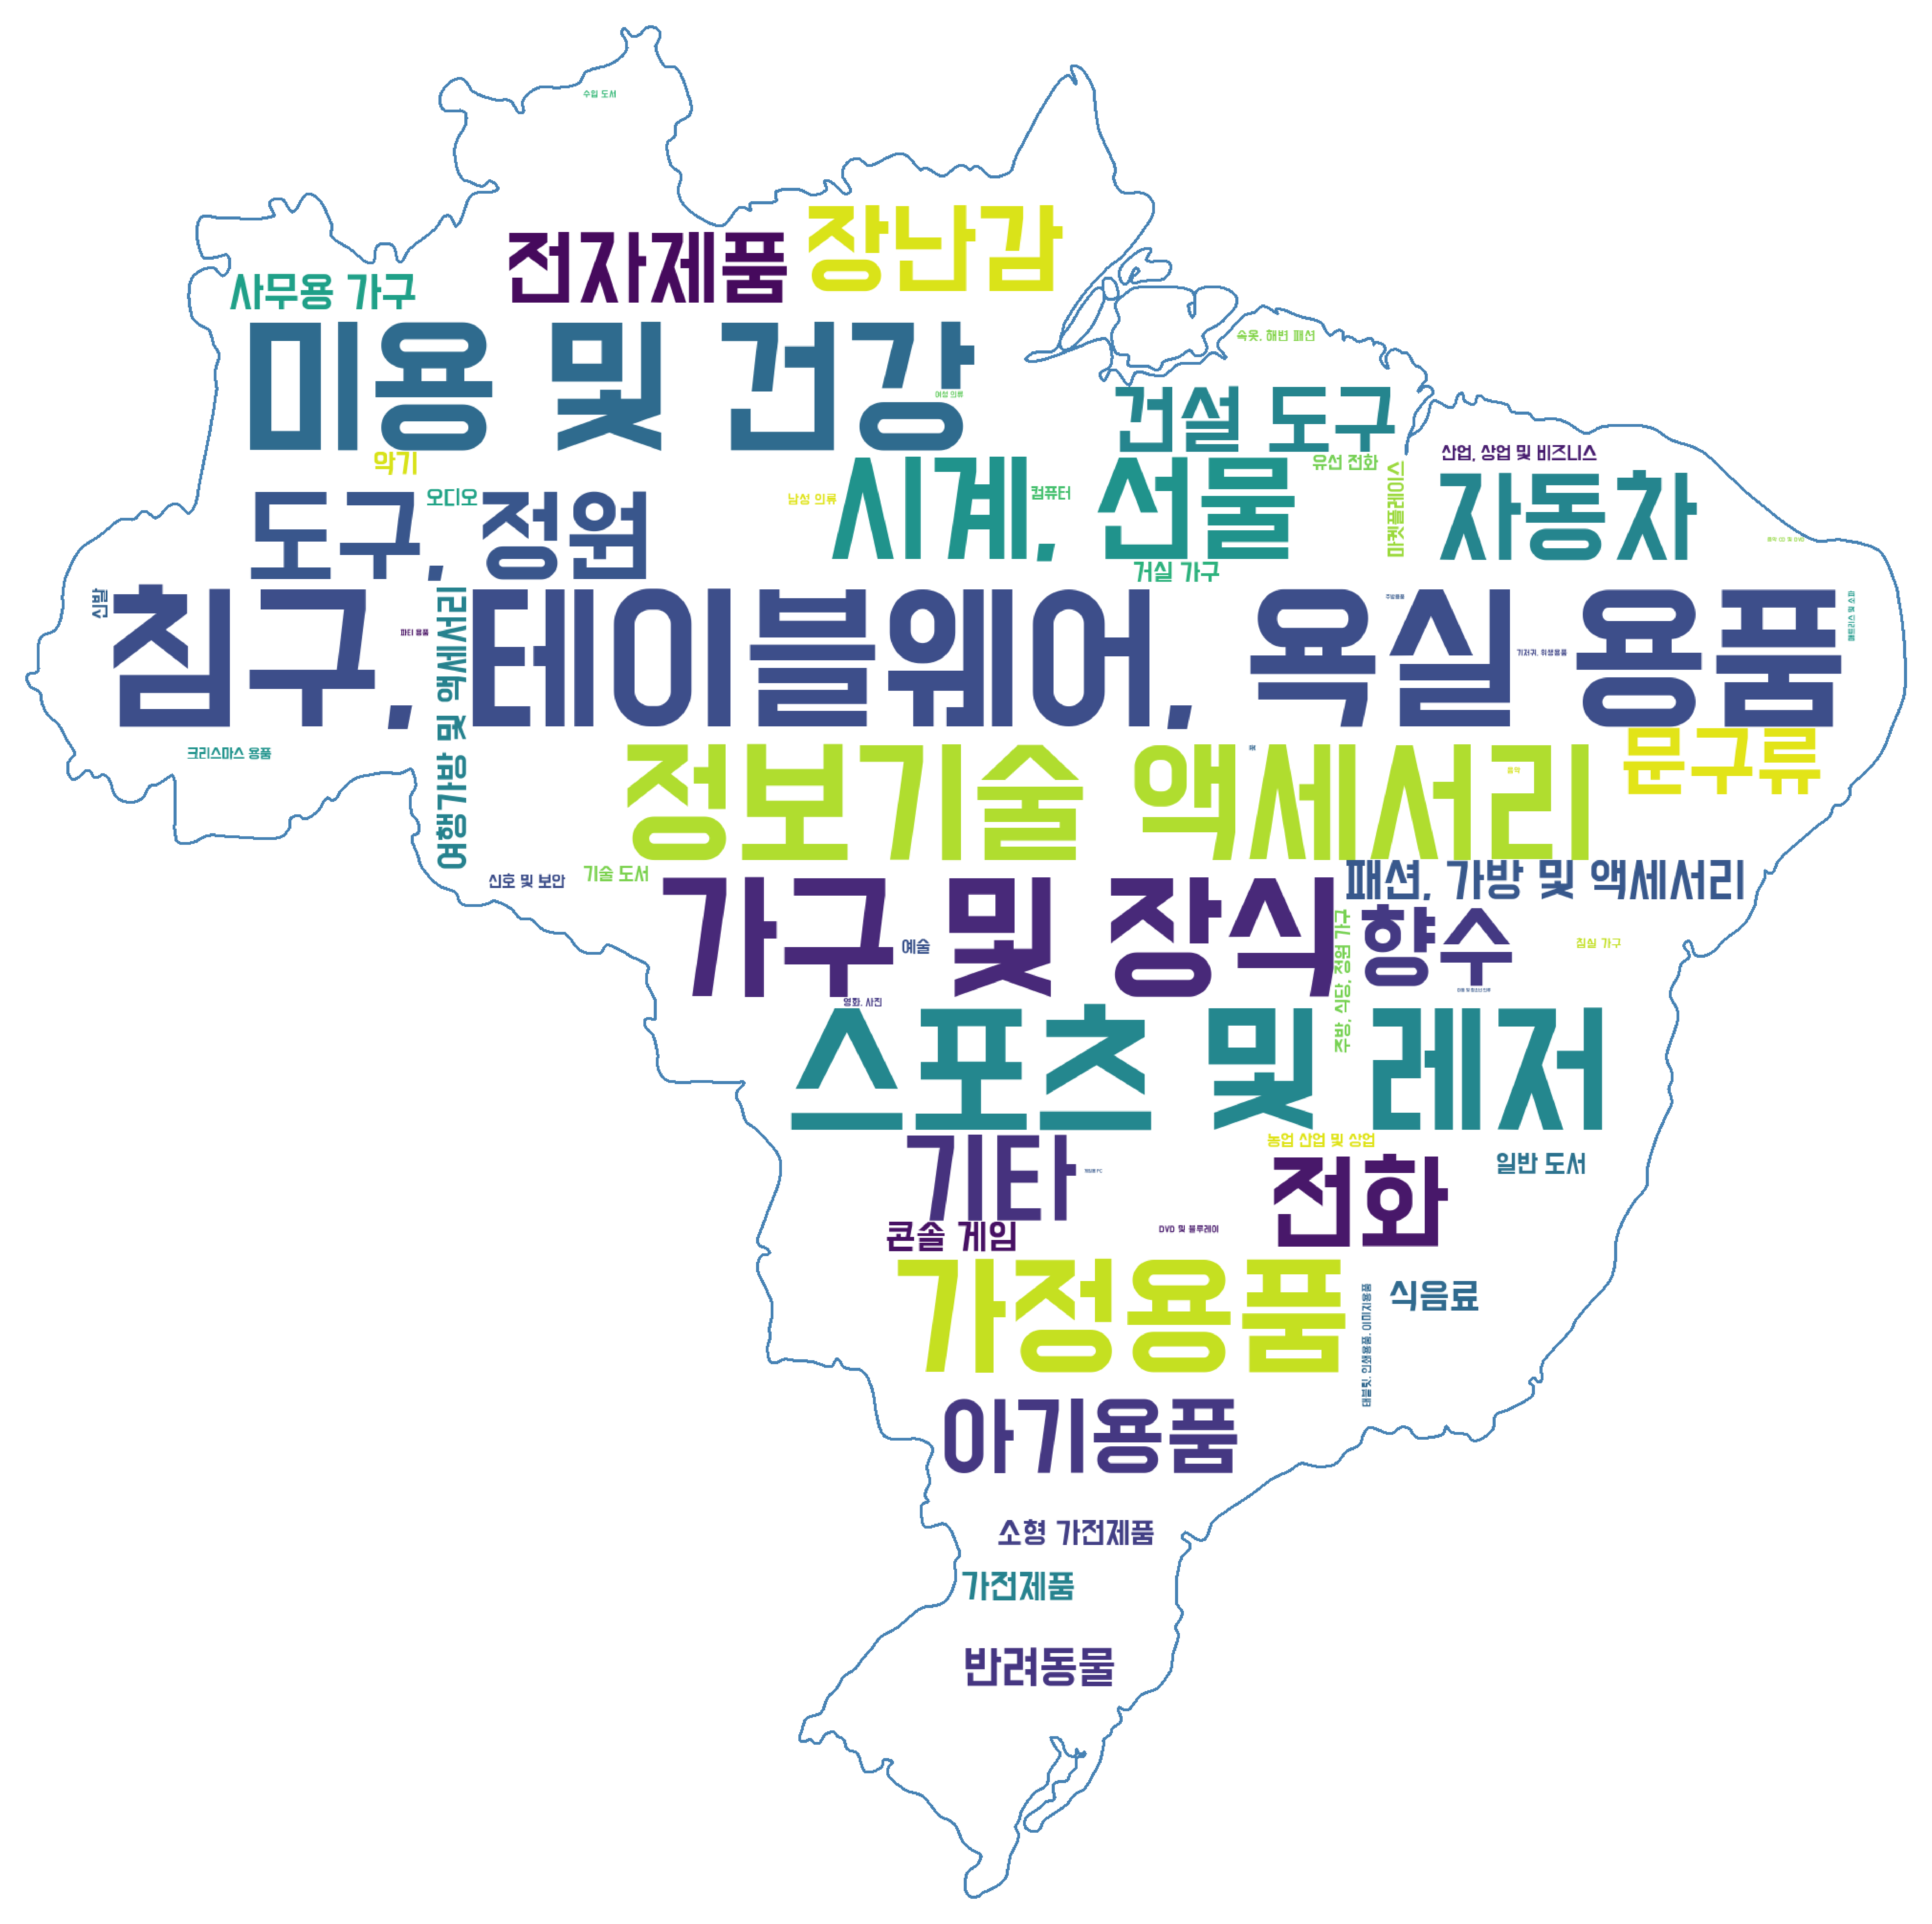

In [17]:
# [워드 클라우드 모양 변경]
# mask 만들기
import PIL
import matplotlib.patches as patches

icon = PIL.Image.open("Images/brazil.png")

import numpy as np

img = PIL.Image.new("RGB", icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

wc = WordCloud(
    random_state=1234,
    font_path=font,
    width=400,
    height=400,
    background_color="white",
    contour_width=3, 
    contour_color='steelblue',
    mask=img,
)

# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_major_category)

# 워드 클라우드 출력하기
plt.figure(figsize=(10, 10), dpi=800)
plt.axis("off")
plt.imshow(img_wordcloud)

